<a href="https://colab.research.google.com/github/noahlim99/DL/blob/main/Pytorch_MNIST_Forward_Pass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
torch.manual_seed(316)

In [ ]:
transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5)),
    ]
)

In [ ]:
trainset = datasets.MNIST('.', download=True, train=True, transform=transform)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:01<00:00, 5473913.12it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 160340.78it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 1298098.08it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 2512268.07it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [ ]:
len(trainset)

60000

In [ ]:
batch_size = 64
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)

In [ ]:
images, labels = next(iter(trainloader))

In [ ]:
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


In [ ]:
image1 = images[0]
image2 = images[1]

In [ ]:
image1.shape

torch.Size([1, 28, 28])

TypeError: Invalid shape (1, 28, 28) for image data

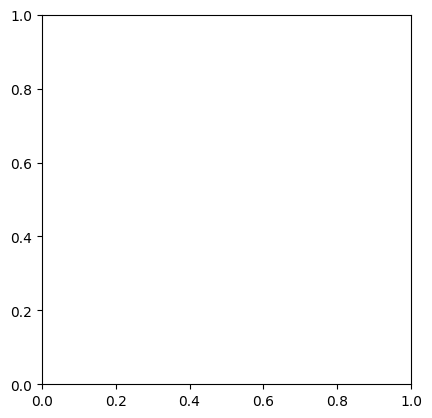

In [ ]:
plt.imshow(image1)

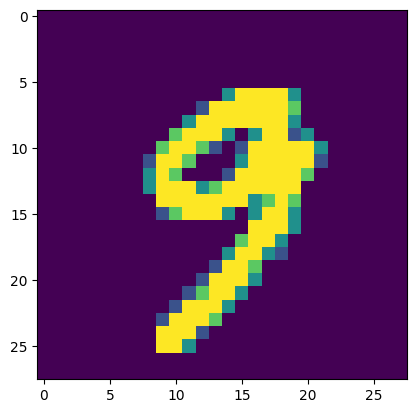

In [ ]:
plt.imshow(image1.squeeze())

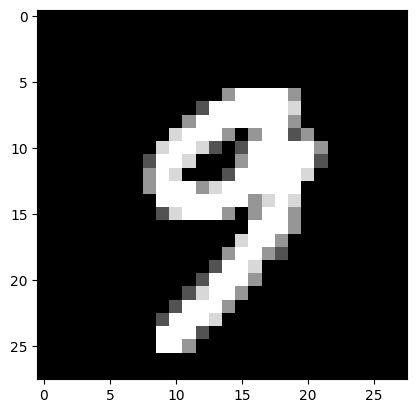

In [ ]:
plt.imshow(image1.squeeze(), cmap='Greys_r')

In [ ]:
print(labels)

tensor([9, 2, 6, 5, 6, 8, 9, 3, 5, 0, 5, 5, 5, 6, 7, 4, 9, 8, 9, 6, 1, 0, 3, 2,
        9, 5, 6, 7, 7, 9, 7, 8, 7, 1, 5, 0, 4, 4, 0, 9, 1, 2, 3, 5, 6, 7, 9, 9,
        5, 4, 7, 6, 5, 0, 1, 3, 9, 2, 6, 1, 1, 8, 3, 5])


In [ ]:
images.shape

torch.Size([64, 1, 28, 28])

In [ ]:
images.view(64,-1).shape

torch.Size([64, 784])

In [ ]:
inputs = images.view(64,-1)

In [ ]:
inputs.shape

torch.Size([64, 784])

In [ ]:
W1 = torch.randn(784, 256)
B1 = torch.randn(256)
W2 = torch.randn(256, 10)
B2 = torch.randn(10)

In [ ]:
def sigmoid(x) :
  return 1 / (1+torch.exp(-x))

In [ ]:
A = sigmoid(torch.mm(inputs, W1) + B1)
output = torch.mm(A, W2) + B2

In [ ]:
output.shape

torch.Size([64, 10])

In [ ]:
output[0].shape

torch.Size([10])

In [ ]:
def softmax(x) :
  return torch.exp(x) / torch.sum(torch.exp(x))

In [ ]:
softmax(output[0])

tensor([3.6014e-01, 1.9156e-08, 5.6000e-01, 5.9402e-17, 4.6017e-12, 7.9854e-02,
        7.1171e-10, 1.0925e-06, 4.3811e-07, 1.7814e-16])

In [ ]:
torch.round(softmax(output[0]), decimals = 4)

tensor([0.3601, 0.0000, 0.5600, 0.0000, 0.0000, 0.0799, 0.0000, 0.0000, 0.0000,
        0.0000])

In [ ]:
torch.sum(softmax(output[0]))

tensor(1.0000)

In [ ]:
probabilities = []
for i in range(64):
  probability = softmax(output[i])
  probabilities.append(probability)

In [ ]:
print("Image 01 =", probabilities[0])
print("Image 02 =", torch.sum(probabilities[1]))

Image 01 = tensor([3.6014e-01, 1.9156e-08, 5.6000e-01, 5.9402e-17, 4.6017e-12, 7.9854e-02,
        7.1171e-10, 1.0925e-06, 4.3811e-07, 1.7814e-16])
Image 02 = tensor(1.0000)


In [ ]:
probabilities

[tensor([3.6014e-01, 1.9156e-08, 5.6000e-01, 5.9402e-17, 4.6017e-12, 7.9854e-02,
         7.1171e-10, 1.0925e-06, 4.3811e-07, 1.7814e-16]),
 tensor([9.6873e-01, 2.0204e-04, 7.0170e-04, 2.6302e-15, 2.3642e-15, 3.0362e-02,
         2.1449e-13, 5.4797e-07, 1.5604e-07, 1.4661e-20]),
 tensor([9.9867e-01, 1.1844e-06, 6.7099e-07, 3.7821e-19, 7.1764e-18, 1.3250e-03,
         5.4958e-12, 1.0468e-07, 5.7167e-08, 1.7874e-16]),
 tensor([9.8420e-01, 2.2144e-05, 3.8282e-04, 1.3175e-14, 4.2958e-16, 1.4723e-02,
         8.4872e-10, 6.4423e-04, 3.0268e-05, 5.6312e-19]),
 tensor([2.4362e-02, 1.9894e-07, 1.5459e-06, 1.5376e-20, 1.5253e-16, 9.7564e-01,
         5.9364e-15, 5.0111e-08, 1.9597e-11, 1.3529e-19]),
 tensor([4.6591e-04, 8.0357e-13, 1.1602e-08, 3.5929e-18, 3.8243e-17, 9.9953e-01,
         1.7127e-12, 2.4139e-09, 1.4904e-13, 8.0045e-25]),
 tensor([9.9994e-01, 2.7884e-05, 1.1106e-09, 9.0575e-23, 6.0435e-18, 3.3356e-05,
         2.7759e-13, 3.1980e-07, 1.3160e-11, 3.3430e-19]),
 tensor([9.9941e-01,

In [ ]:
def softmax(x) :
  return torch.exp(x) / torch.sum(torch.exp(x), dim = 1).view(-1,1)

In [ ]:
softmax(output)

tensor([[3.6014e-01, 1.9156e-08, 5.6000e-01, 5.9402e-17, 4.6017e-12, 7.9854e-02,
         7.1171e-10, 1.0925e-06, 4.3811e-07, 1.7814e-16],
        [9.6873e-01, 2.0204e-04, 7.0170e-04, 2.6302e-15, 2.3642e-15, 3.0362e-02,
         2.1449e-13, 5.4797e-07, 1.5604e-07, 1.4661e-20],
        [9.9867e-01, 1.1844e-06, 6.7099e-07, 3.7821e-19, 7.1764e-18, 1.3250e-03,
         5.4958e-12, 1.0468e-07, 5.7167e-08, 1.7874e-16],
        [9.8420e-01, 2.2144e-05, 3.8282e-04, 1.3175e-14, 4.2958e-16, 1.4723e-02,
         8.4872e-10, 6.4423e-04, 3.0268e-05, 5.6312e-19],
        [2.4362e-02, 1.9894e-07, 1.5459e-06, 1.5376e-20, 1.5253e-16, 9.7564e-01,
         5.9364e-15, 5.0111e-08, 1.9597e-11, 1.3529e-19],
        [4.6591e-04, 8.0357e-13, 1.1602e-08, 3.5929e-18, 3.8243e-17, 9.9953e-01,
         1.7127e-12, 2.4139e-09, 1.4904e-13, 8.0045e-25],
        [9.9994e-01, 2.7884e-05, 1.1106e-09, 9.0575e-23, 6.0435e-18, 3.3356e-05,
         2.7759e-13, 3.1980e-07, 1.3160e-11, 3.3430e-19],
        [9.9941e-01, 5.0576

In [ ]:
from torch import nn

In [ ]:
softmax = nn.Softmax(dim = 1)
softmax(output)

tensor([[3.6014e-01, 1.9156e-08, 5.6000e-01, 5.9402e-17, 4.6017e-12, 7.9854e-02,
         7.1171e-10, 1.0925e-06, 4.3811e-07, 1.7814e-16],
        [9.6873e-01, 2.0204e-04, 7.0170e-04, 2.6302e-15, 2.3642e-15, 3.0362e-02,
         2.1449e-13, 5.4797e-07, 1.5604e-07, 1.4661e-20],
        [9.9867e-01, 1.1844e-06, 6.7099e-07, 3.7822e-19, 7.1764e-18, 1.3250e-03,
         5.4958e-12, 1.0468e-07, 5.7167e-08, 1.7874e-16],
        [9.8420e-01, 2.2144e-05, 3.8282e-04, 1.3175e-14, 4.2959e-16, 1.4723e-02,
         8.4872e-10, 6.4423e-04, 3.0268e-05, 5.6311e-19],
        [2.4362e-02, 1.9894e-07, 1.5459e-06, 1.5377e-20, 1.5253e-16, 9.7564e-01,
         5.9364e-15, 5.0111e-08, 1.9597e-11, 1.3529e-19],
        [4.6591e-04, 8.0357e-13, 1.1602e-08, 3.5929e-18, 3.8243e-17, 9.9953e-01,
         1.7127e-12, 2.4139e-09, 1.4904e-13, 8.0045e-25],
        [9.9994e-01, 2.7884e-05, 1.1106e-09, 9.0575e-23, 6.0435e-18, 3.3356e-05,
         2.7759e-13, 3.1980e-07, 1.3160e-11, 3.3430e-19],
        [9.9941e-01, 5.0576

In [ ]:
from collections import OrderedDict

model = nn.Sequential(OrderedDict(
  [
    ('W1', nn.Linear(784, 256)),
    ('sigmoid', nn.Sigmoid()),
    ('W2', nn.Linear(256, 10)),
    ('softmax', nn.Softmax(dim = 1))
  ]
))
print(model)

Sequential(
  (W1): Linear(in_features=784, out_features=256, bias=True)
  (sigmoid): Sigmoid()
  (W2): Linear(in_features=256, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)


In [ ]:
# W1 가중치 행렬의 크기 출력
print(model[0].weight.shape)  # 출력: torch.Size([256, 784])


torch.Size([256, 784])


In [ ]:
import torch
from torch import nn
from collections import OrderedDict

# 모델 구성
model = nn.Sequential(OrderedDict(
    [
        ('W1', nn.Linear(784, 256)),  # 입력층(784) -> 은닉층(256)
        ('sigmoid', nn.Sigmoid()),    # 활성화 함수: Sigmoid
        ('W2', nn.Linear(256, 10)),   # 은닉층(256) -> 출력층(10)
        ('softmax', nn.Softmax(dim=1)) # 소프트맥스 출력
    ]
))

# W1 가중치 행렬의 크기를 구하여 출력
W1_shape = W1.shape  # 첫 번째 레이어의 가중치 크기
print(f"W[1] = ({W1_shape[1]}, {W1_shape[0]})")  # 원하는 형식으로 출력


W[1] = (256, 784)


In [ ]:
W1.shape

torch.Size([784, 256])

In [ ]:
W1_shape = model[0].weight.shape
print(f"W[1] = ({W1_shape[1]}, {W1_shape[0]})")

W[1] = (784, 256)
